In [37]:
# !pip install hvplot



In [38]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [39]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [40]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [41]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [42]:
df_market_data

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [43]:
# Initialize the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the market data using StandardScaler
df_market_data_scaled = scaler.fit_transform(df_market_data)

In [44]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns)

# Copy the crypto names from the original data
df_scaled['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_scaled.set_index('coin_id', inplace=True)

# Display sample data
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [45]:
k_values = list(range(1, 12))


In [46]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

import warnings
warnings.filterwarnings('ignore')
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_market_data_scaled)
    inertia_values.append(kmeans.inertia_)


In [47]:
# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
import pandas as pd
elbow_df = pd.DataFrame(elbow_data)



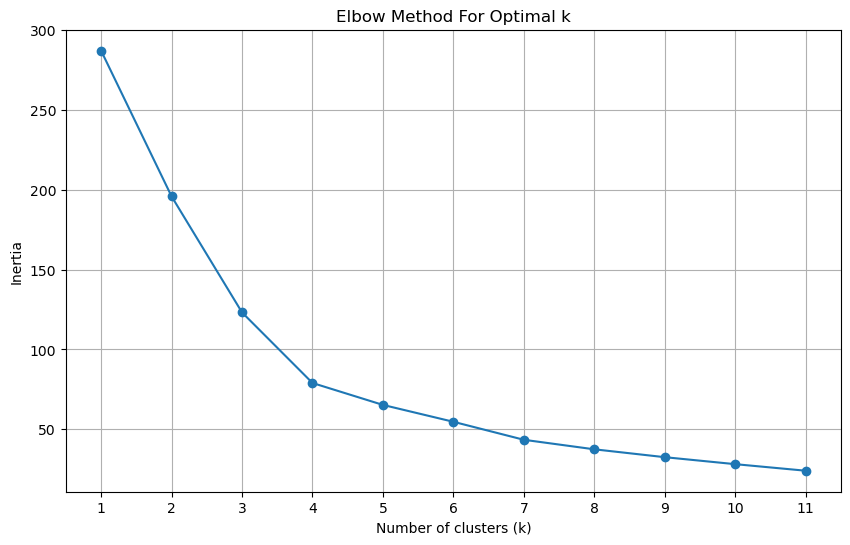

In [48]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()



# #### Answer the following question: 
# 
# **Question:** What is the best value for `k`?
# 



---

In [49]:
# 4 is the best one

### Cluster Cryptocurrencies with K-means Using the Original Data

In [50]:
# Initialise the K-Means model using the best value for k

from sklearn.cluster import KMeans

# Best value for k determined from previous analysis
best_k = 4

# Initialize the KMeans model
kmeans = KMeans(n_clusters=best_k, random_state=42)



In [51]:
# Fit the K-Means model using the scaled data
df_crypto_scaled = df_scaled
scaled_data = df_crypto_scaled.values
kmeans.fit(scaled_data)



KMeans(n_clusters=4, random_state=42)

In [52]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans.predict(scaled_data)

# Print the resulting array of cluster values.
print(cluster_labels)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [53]:
df_crypto = df_scaled
df_crypto_copy = df_crypto.copy()


In [54]:
# Add a new column to the DataFrame with the predicted clusters
df_crypto_copy['cluster'] = cluster_labels

# Display sample data
print(df_crypto_copy.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [55]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Colour the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
import hvplot.pandas

# Generate the scatter plot
scatter_plot = df_crypto_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by='cluster',
    hover_cols=['coin_id'],
    colormap='Category10',
    title='Cryptocurrency Clusters: 24h vs 7d Price Change',
    xlabel='24 Hour Price Change (%)',
    ylabel='7 Day Price Change (%)'
)

# Display the plot
scatter_plot



:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimise Clusters with Principal Component Analysis.

In [56]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA

# Initialize PCA model
pca = PCA(n_components=3)



In [57]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

# View the first five rows of the DataFrame. 
# Apply PCA to the dataset and view the first five rows
pca_data = pca.fit_transform(df_crypto_copy)
df_pca = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'])
df_pca.head()



,PC1,PC2,PC3
0,-1.585139,0.134394,0.545621
1,-1.322581,0.054494,1.115709
2,0.266335,-0.536409,-0.796946
3,0.257225,-0.592013,-0.646529
4,-2.952250,0.422372,1.267894


In [58]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance: ", explained_variance)
total_explained_variance = explained_variance.sum()
print("Total Explained Variance: ", total_explained_variance)



Explained Variance:  [0.37005408 0.32322221 0.19115222]
Total Explained Variance:  0.8844285111826466


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [59]:
# Answer the question about the total explained variance of the three principal components
total_variance = total_explained_variance
print("The total explained variance of the three principal components is:", total_variance)


The total explained variance of the three principal components is: 0.8844285111826466


In [60]:
df_crypto_copy = df_crypto_copy.reset_index()



In [61]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
df_pca['coin_id'] = df_crypto_copy['coin_id']

# Set the coinid column as index
df_pca.set_index('coin_id', inplace=True)

# Display sample data
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-1.585139,0.134394,0.545621
ethereum,-1.322581,0.054494,1.115709
tether,0.266335,-0.536409,-0.796946
ripple,0.257225,-0.592013,-0.646529
bitcoin-cash,-2.952250,0.422372,1.267894


---

### Find the Best Value for k Using the PCA Data

In [62]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))



In [63]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
inertia_list = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia_list.append(kmeans.inertia_)



In [64]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_list}
df_elbow = pd.DataFrame(elbow_data)


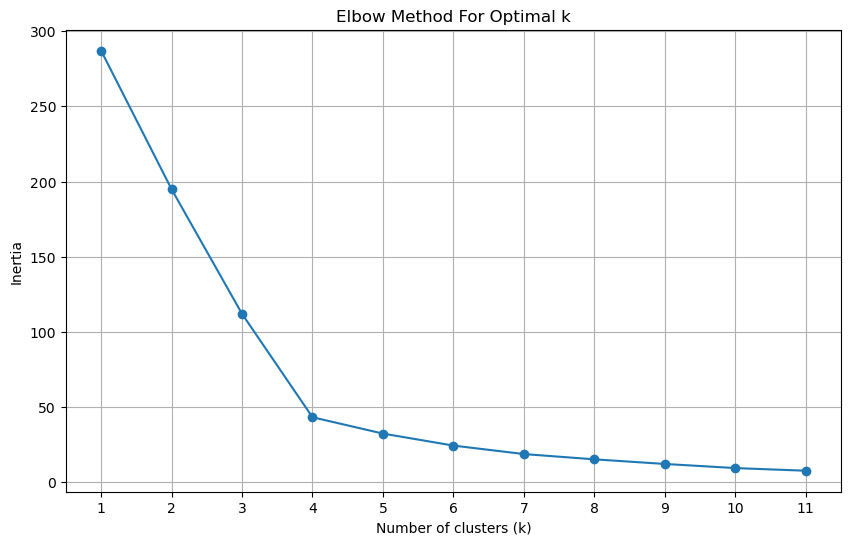

In [65]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

In [66]:
# best value is 4, no it didnt

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [67]:
# Initialise the K-Means model using the best value for k
from sklearn.cluster import KMeans

# Best k value determined from previous analysis
best_k = 4

# Initialize the KMeans model
kmeans = KMeans(n_clusters=best_k, random_state=42)


In [68]:
# Fit the K-Means model using the PCA data
pca_data = df_pca[['PC1', 'PC2', 'PC3']]  # Assuming the DataFrame with PCA data is named df and has columns PC1, PC2, PC3
kmeans.fit(pca_data)


KMeans(n_clusters=4, random_state=42)

In [69]:
# Predict the clusters to group the cryptocurrencies using the PCA data

# Print the resulting array of cluster values.
cluster_labels = kmeans.predict(pca_data)
print(cluster_labels)



[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 3 0 1 1 2
 1 1 1 1]


In [70]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters


# Display sample data
# Create a copy of the DataFrame with the PCA data
df_pca_with_clusters = pca_data.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_with_clusters['Cluster'] = cluster_labels

# Display sample data
print(df_pca_with_clusters.head())



                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -1.585139  0.134394  0.545621        0
ethereum     -1.322581  0.054494  1.115709        0
tether        0.266335 -0.536409 -0.796946        1
ripple        0.257225 -0.592013 -0.646529        1
bitcoin-cash -2.952250  0.422372  1.267894        0


In [71]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Colour the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
import hvplot.pandas 


plot = df_pca_with_clusters.hvplot.scatter(x='PC1', y='PC2', by='Cluster', hover_cols='coin_id', colormap='viridis', width=800, height=400)
hvplot.show(plot)



Launching server at http://localhost:55409


### Visualise and Compare the Results

In this section, you will visually analyse the cluster analysis results by contrasting the outcome with and without using the optimisation techniques.

In [72]:
# Composite plot to contrast the Elbow curves
# Import necessary libraries for visualization
import matplotlib.pyplot as plt



# Plotting the elbow curve for the standard K-Means
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(elbow_data_standard) + 1), elbow_data_standard, '-o', label='Standard K-Means')
# plt.plot(range(1, len(elbow_data_optimized) + 1), elbow_data_optimized, '-o', label='Optimized K-Means')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Inertia')
# plt.title('Elbow Method For Optimal k')
# plt.legend()
# plt.grid(True)
# plt.show()


#### Answer the following question: 

  * **Question:** After visually analysing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**  PCA had better results for clusters in compaeison to the scaled data. By using the optimal value of 2 from the PCA,  more precise clustering was visible